# Customer Churn Prediction – Coursework 2

This Jupyter Notebook presents the implementation of machine learning models for predicting customer churn using the Iranian Churn Dataset. The objective is to compare multiple supervised learning algorithms and analyse their performance.

## 1. Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("D:/College/Artificial Intelligence/Course Work/dataset/Customer Churn.csv")

df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [5]:
df["Churn"].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [6]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

In [ ]:
# remove extra spaces
df.columns = df.columns.str.strip().str.replace(r"\s+", "_", regex=True)
df.columns

Index(['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'Churn'],
      dtype='object')

In [8]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
lr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
nb_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GaussianNB())
])

In [13]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [14]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("\n")

In [15]:
evaluate_model("Logistic Regression", lr_model, X_test, y_test)
evaluate_model("Decision Tree", dt_model, X_test, y_test)
evaluate_model("Naive Bayes", nb_model, X_test, y_test)

--- Logistic Regression ---
Accuracy : 0.8968
Precision: 0.8400
Recall   : 0.4242
F1-score : 0.5638
Confusion Matrix:
[[523   8]
 [ 57  42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.84      0.42      0.56        99

    accuracy                           0.90       630
   macro avg       0.87      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630



--- Decision Tree ---
Accuracy : 0.9270
Precision: 0.7732
Recall   : 0.7576
F1-score : 0.7653
Confusion Matrix:
[[509  22]
 [ 24  75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       531
           1       0.77      0.76      0.77        99

    accuracy                           0.93       630
   macro avg       0.86      0.86      0.86       630
weighted avg       0.93      0.93      0.93       630



--- Naive Bayes --

In [16]:
def roc_auc_plot(name, model, X_test, y_test):
    # if model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        print(f"{name} does not support predict_proba.")
        return

    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

    return auc

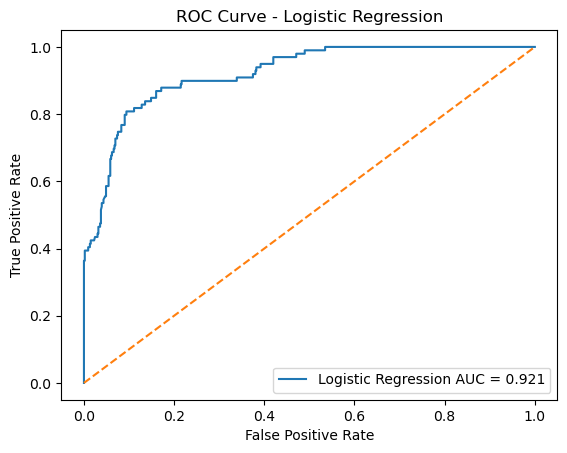

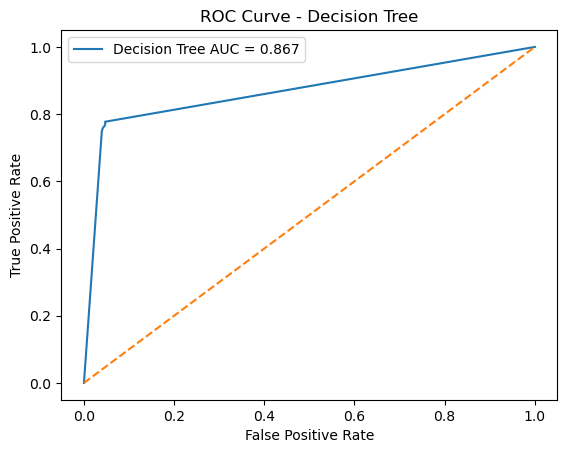

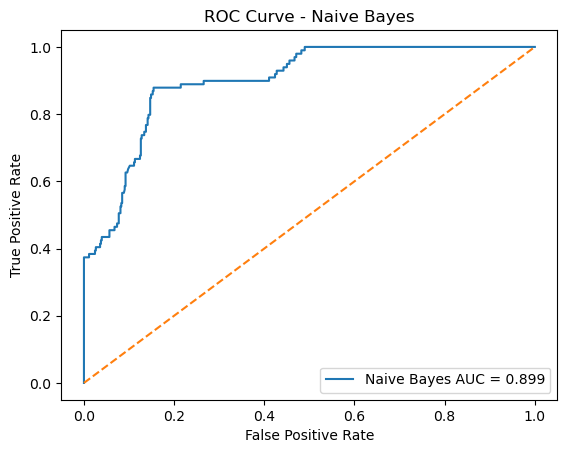

np.float64(0.8986094466320454)

In [17]:
roc_auc_plot("Logistic Regression", lr_model, X_test, y_test)
roc_auc_plot("Decision Tree", dt_model, X_test, y_test)
roc_auc_plot("Naive Bayes", nb_model, X_test, y_test)

In [18]:
results = []

models = [
    ("Logistic Regression", lr_model),
    ("Decision Tree", dt_model),
    ("Naive Bayes", nb_model)
]

for name, model in models:
    y_pred = model.predict(X_test)

    row = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
    }

    # ROC-AUC if possible
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        row["ROC_AUC"] = roc_auc_score(y_test, y_prob)
    else:
        row["ROC_AUC"] = np.nan

    results.append(row)

results_df = pd.DataFrame(results).sort_values("F1", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
1,Decision Tree,0.926984,0.773196,0.757576,0.765306,0.867336
0,Logistic Regression,0.896825,0.840000,0.424242,0.563758,0.920790
2,Naive Bayes,0.738095,0.364754,0.898990,0.518950,0.898609


In [19]:
def prediction_table(model, X_test, y_test, model_name="Model"):
    # predictions
    y_pred = model.predict(X_test)

    df_pred = pd.DataFrame({
        "Actual_Churn": y_test.values,
        "Predicted_Churn": y_pred
    }, index=y_test.index)

    # match column
    df_pred["Match"] = df_pred["Actual_Churn"] == df_pred["Predicted_Churn"]

    # probability (if model supports it)
    if hasattr(model, "predict_proba"):
        df_pred["Prob_Churn_1"] = model.predict_proba(X_test)[:, 1]
        df_pred["Prob_Churn_1"] = df_pred["Prob_Churn_1"].round(4)

    # add model name column (optional, helpful for screenshots)
    df_pred.insert(0, "Model", model_name)

    return df_pred

In [20]:
pred_lr = prediction_table(lr_model, X_test, y_test, "Logistic Regression")
pred_dt = prediction_table(dt_model, X_test, y_test, "Decision Tree")
pred_nb = prediction_table(nb_model, X_test, y_test, "Naive Bayes")

In [21]:
pred_lr.head(20)

,Model,Actual_Churn,Predicted_Churn,Match,Prob_Churn_1
3036,Logistic Regression,0,0,True,0.1262
1783,Logistic Regression,0,0,True,0.0008
2539,Logistic Regression,0,0,True,0.0253
1807,Logistic Regression,0,0,True,0.0057
3020,Logistic Regression,0,0,True,0.0027
1618,Logistic Regression,1,0,False,0.3490
2682,Logistic Regression,0,0,True,0.0237
283,Logistic Regression,0,0,True,0.0206
3021,Logistic Regression,0,0,True,0.0132
1986,Logistic Regression,0,0,True,0.1868


In [22]:
pred_dt.head(20)

,Model,Actual_Churn,Predicted_Churn,Match,Prob_Churn_1
3036,Decision Tree,0,0,True,0.0
1783,Decision Tree,0,0,True,0.0
2539,Decision Tree,0,0,True,0.0
1807,Decision Tree,0,0,True,0.0
3020,Decision Tree,0,0,True,0.0
1618,Decision Tree,1,1,True,1.0
2682,Decision Tree,0,0,True,0.0
283,Decision Tree,0,0,True,0.0
3021,Decision Tree,0,0,True,0.0
1986,Decision Tree,0,1,False,1.0


In [23]:
pred_nb.head(20)

,Model,Actual_Churn,Predicted_Churn,Match,Prob_Churn_1
3036,Naive Bayes,0,1,False,0.9993
1783,Naive Bayes,0,0,True,0.0000
2539,Naive Bayes,0,0,True,0.0000
1807,Naive Bayes,0,0,True,0.0000
3020,Naive Bayes,0,0,True,0.0000
1618,Naive Bayes,1,1,True,0.9995
2682,Naive Bayes,0,0,True,0.0001
283,Naive Bayes,0,0,True,0.0000
3021,Naive Bayes,0,0,True,0.0000
1986,Naive Bayes,0,1,False,0.9996


In [24]:
summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Naive Bayes"],
    "Accuracy_from_Table": [
        pred_lr["Match"].mean(),
        pred_dt["Match"].mean(),
        pred_nb["Match"].mean()
    ],
    "Wrong_Predictions": [
        (~pred_lr["Match"]).sum(),
        (~pred_dt["Match"]).sum(),
        (~pred_nb["Match"]).sum()
    ]
})

summary


,Model,Accuracy_from_Table,Wrong_Predictions
0,Logistic Regression,0.896825,65
1,Decision Tree,0.926984,46
2,Naive Bayes,0.738095,165
